In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import itertools
import scipy.stats as scs
import statsmodels.api as sm

In [2]:
from get_clean_data_LinReg import get_data, clean_data, get_feats, get_target
from plot_results_and_residuals import plot_results, plot_residuals

<h3>Code to get features from df - BIG Plans = ptp cnt > 100000</h3>

In [ ]:
def get_clean_feats(year):
    prelim_df = get_data(year)
    df = clean_data(prelim_df, year)
    df = df[df['part_cnt_{}'.format(year)] > 100000]
    feats = get_feats(df, year)
    X = feats[['eir','fndng_tgt_{}'.format(year), 'tgt_nrml_cost_{}'.format(year), 'pmts_to_part_{}'.format(year)]]
    X['eir_ft'] = X['eir']/100 * X['fndng_tgt_{}'.format(year)]
    X['eir_tnc'] = X['eir']/100 * X['tgt_nrml_cost_{}'.format(year)]
    X['eir_pmt'] = X['eir']/100 * X['pmts_to_part_{}'.format(year)]
    y = get_target(df, year)
    y = y[df['part_cnt_{}'.format(year)] > 100000]
    return X, y

<h3>Features:</h3>
    <ul><li>Prior year funding target
        <li>Prior year target normal cost (expected growth in funding target)
        <li>Prior year benefits paid
        <li>Prior year effective interest rate (single effective rate that approximates the effect of 3-tiered rates actually used to value funding target
    </ul>

<h3>Interaction Features: Interest on FT, TNC, Pmts</h3>

In [ ]:
X, y = get_clean_feats(2014)

In [ ]:
len(X), len(y)

<h2>Fit a Linear Regression</h2>

In [20]:
def summary_model(X, y, label='scatter'):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    summary = model.summary()
    return summary

In [ ]:
summary_model(X,y)

<h1>Test on 2015 Data</h1>

In [ ]:
def get_clean_feats(year):
    prelim_df = get_data(year)
    df = clean_data(prelim_df, year)
    df = df[df['part_cnt_{}'.format(year)] > 100000]
    feats = get_feats(df, year)
    X = feats[['eir','fndng_tgt_{}'.format(year), 'tgt_nrml_cost_{}'.format(year), 'pmts_to_part_{}'.format(year)]]
    X['eir_ft'] = X['eir']/100 * X['fndng_tgt_{}'.format(year)]
    X['eir_tnc'] = X['eir']/100 * X['tgt_nrml_cost_{}'.format(year)]
    X['eir_pmt'] = X['eir']/100 * X['pmts_to_part_{}'.format(year)]
    y = get_target(df, year)
    y = y[df['part_cnt_{}'.format(year)] > 100000]
    return X, y

In [ ]:
'''Fit Model (on 2014 data) to Test Predictions'''
X = sm.add_constant(X)
lin_model = sm.OLS(y, X).fit()

In [ ]:
X15, y15 = get_clean_feats(2015)

In [ ]:
len(X15), len(y15)

In [ ]:
len(X15_test), len(y15_test)

In [ ]:
X15 = sm.add_constant(X15)
yhat15 = lin_model.predict(X15)

In [ ]:
plot_results(y15,yhat15)

In [ ]:
plot_residuals(y15, yhat15)

<h3>Residual Analysis</h3>

In [ ]:
resid_15 = y15-yhat15
resid_15

In [ ]:
resid_15.describe()

In [ ]:
year = 2015
prelim_df_15 = get_data(year)
df_15 = clean_data(prelim_df_15, year)
df_15 = df_15[df_15['part_cnt_{}'.format(year)] > 100000]

In [ ]:
df_15

In [ ]:
yhat15.index

In [ ]:
pd.DataFrame(yhat15).rename(columns={0:'Residual'})

In [ ]:
df_15_full = df_15.merge(pd.DataFrame(yhat15).rename(columns={0:'Predicted_FT_2016'}),on=df_15.index,right_index=True)
df_15_full
#df_15[(~df_15.col1.isin(common.col1))&(~df1.col2.isin(common.col2))]

In [ ]:
df_15_full['Residual_16'] = df_15_full['fndng_tgt_2016'] - df_15_full['Predicted_FT_2016']

In [ ]:
df_15_full

In [ ]:
df_15_full.describe()

<h3>Graph of Predicted 2016 Funding Target vs Actual 2016 Funding Target<br>
All Plans</h3>

In [ ]:
num_to_plot = len(y15)
y_true = y15
y_pred = yhat15
xx = np.linspace(0,num_to_plot,num_to_plot)
plt.figure(figsize=(20,8))
plt.plot(xx, y_true, color='cyan', label='Actual 2016 Funding Target')
plt.plot(xx, y_pred, color='magenta', label='Predicted 2016 Funding Target' )
#plt.scatter(y_true,y_pred, s=20, color=next(colors), label="data")
plt.xlabel("data")
plt.ylabel("Funding Target")
plt.title("Predicting Funding Target from Linear Regression trained on 2014 data")
plt.legend()
plt.show()

<h1>Test Scripts</h1>

In [37]:
def get_data_partitioned_by_count(year, min_count:int, max_count:int):
    '''
    Executes SQL Query to retrieve data from prior year
    Cleans data 
    Slices and returns data according to min, max count
    '''
    prelim_df = get_data(year)
    df = clean_data(prelim_df, year)
    X_all = get_feats(df, year)
    y_all = get_target(df, year)
    X = X_all[(X_all['part_cnt_{}'.format(year)] > min_count) & (X_all['part_cnt_{}'.format(year)] <= max_count)]
    y = y_all[(X_all['part_cnt_{}'.format(year)] > min_count) & (X_all['part_cnt_{}'.format(year)] <= max_count)]
    return X, y

In [38]:
X14, y14 = get_data_partitioned_by_count(2014, 100000, 500000)

In [39]:
len(X14), len(y14)

(245, 245)

In [52]:
'''Fit Model (on 2014 data) to Test Predictions'''
X14 = sm.add_constant(X14)
lin_model_2 = sm.OLS(y14, X14).fit()
lin_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         fndng_tgt_2015   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.033e+04
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:41:18   Log-Likelihood:                -5147.0
No. Observations:                 245   AIC:                         1.031e+04
Df Residuals:                     236   BIC:                         1.034e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.274e+08   3.15e+09      0.040      0.968   -6.07e+09    6.33e+09
eir                 2.524e+08   4.85e+10      0.005      0.996   -9.53e+10    9.58e+10
part_cnt_2014       -285.0780    355.048     -0.803      0.423    -984.547     414.390
fndng_tgt_2014         3.2112      0.724      4.436      0.000       1.785       4.637
tgt_nrml_cost_2014   -10.2520     10.873     -0.943      0.347     -31.673      11.168
pmts_to_part_2014    -26.8808      7.889     -3.407      0.001     -42.423     -11.338
eir_ft               -33.0651     11.096     -2.980      0.003     -54.925     -11.206
eir_tnc              181.0724    166.975      1.084      0.279    -147.879     510.024
eir_pmt              401.0193    121.123      3.311      0.001     162.398     639.640
==============================================================================
Omnibus:                      200.507   Durbin-Watson:                   0.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2251.668
Skew:                           3.365   Prob(JB):                         0.00
Kurtosis:                      16.239   Cond. No.                     3.42e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h1>Test on 2015 Data</h1>

In [43]:
X15_test, y15_test = get_data_partitioned_by_count(2015, 100000, 500000)

In [44]:
X15_test = sm.add_constant(X15_test)
yhat15_test = lin_model_2.predict(X15_test)

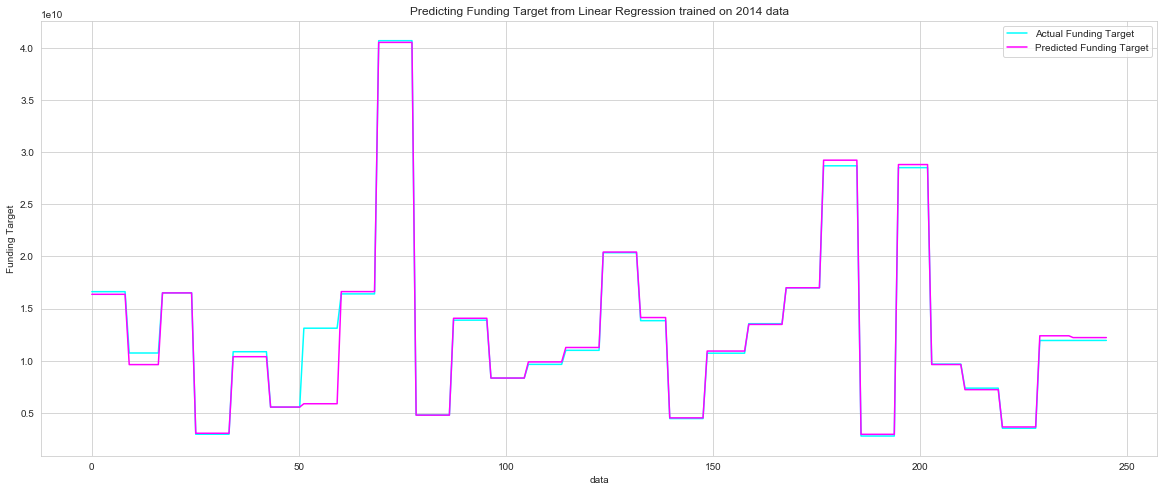

In [45]:
plot_results(y15_test, yhat15_test)

<h1>Test on 2016 Data</h1>

In [49]:
X16_test, y16_test = get_data_partitioned_by_count(2016, 100000, 500000)

In [50]:
X16_test = sm.add_constant(X16_test)
yhat16_test = lin_model_2.predict(X16_test)

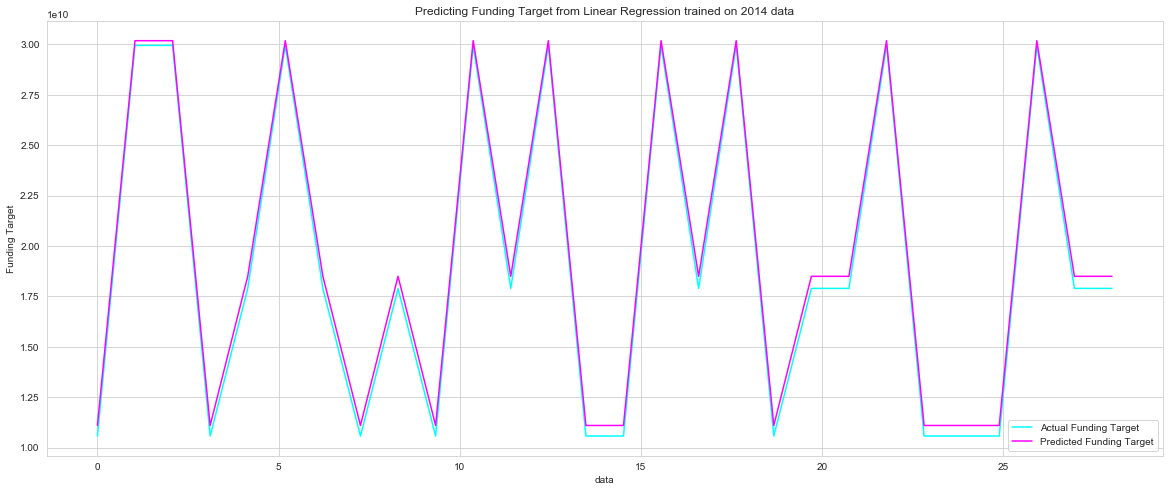

In [51]:
plot_results(y16_test, yhat16_test)

<h1>Test on 2017 Data</h1>

In [53]:
X17_test, y17_test = get_data_partitioned_by_count(2017, 100000, 500000)

In [55]:
len(X17_test), len(y17_test)

(0, 0)

In [56]:
X17_test = sm.add_constant(X17_test)
yhat17_test = lin_model_2.predict(X17_test)

In [ ]:
plot_results(y17_test, yhat17_test)